In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/playground-series-s4e11/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e11/test.csv")
df_submission = pd.read_csv("/kaggle/input/playground-series-s4e11/sample_submission.csv")

In [3]:
print(df_train.shape, df_test.shape)

(140700, 20) (93800, 19)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [6]:
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [7]:
df_test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


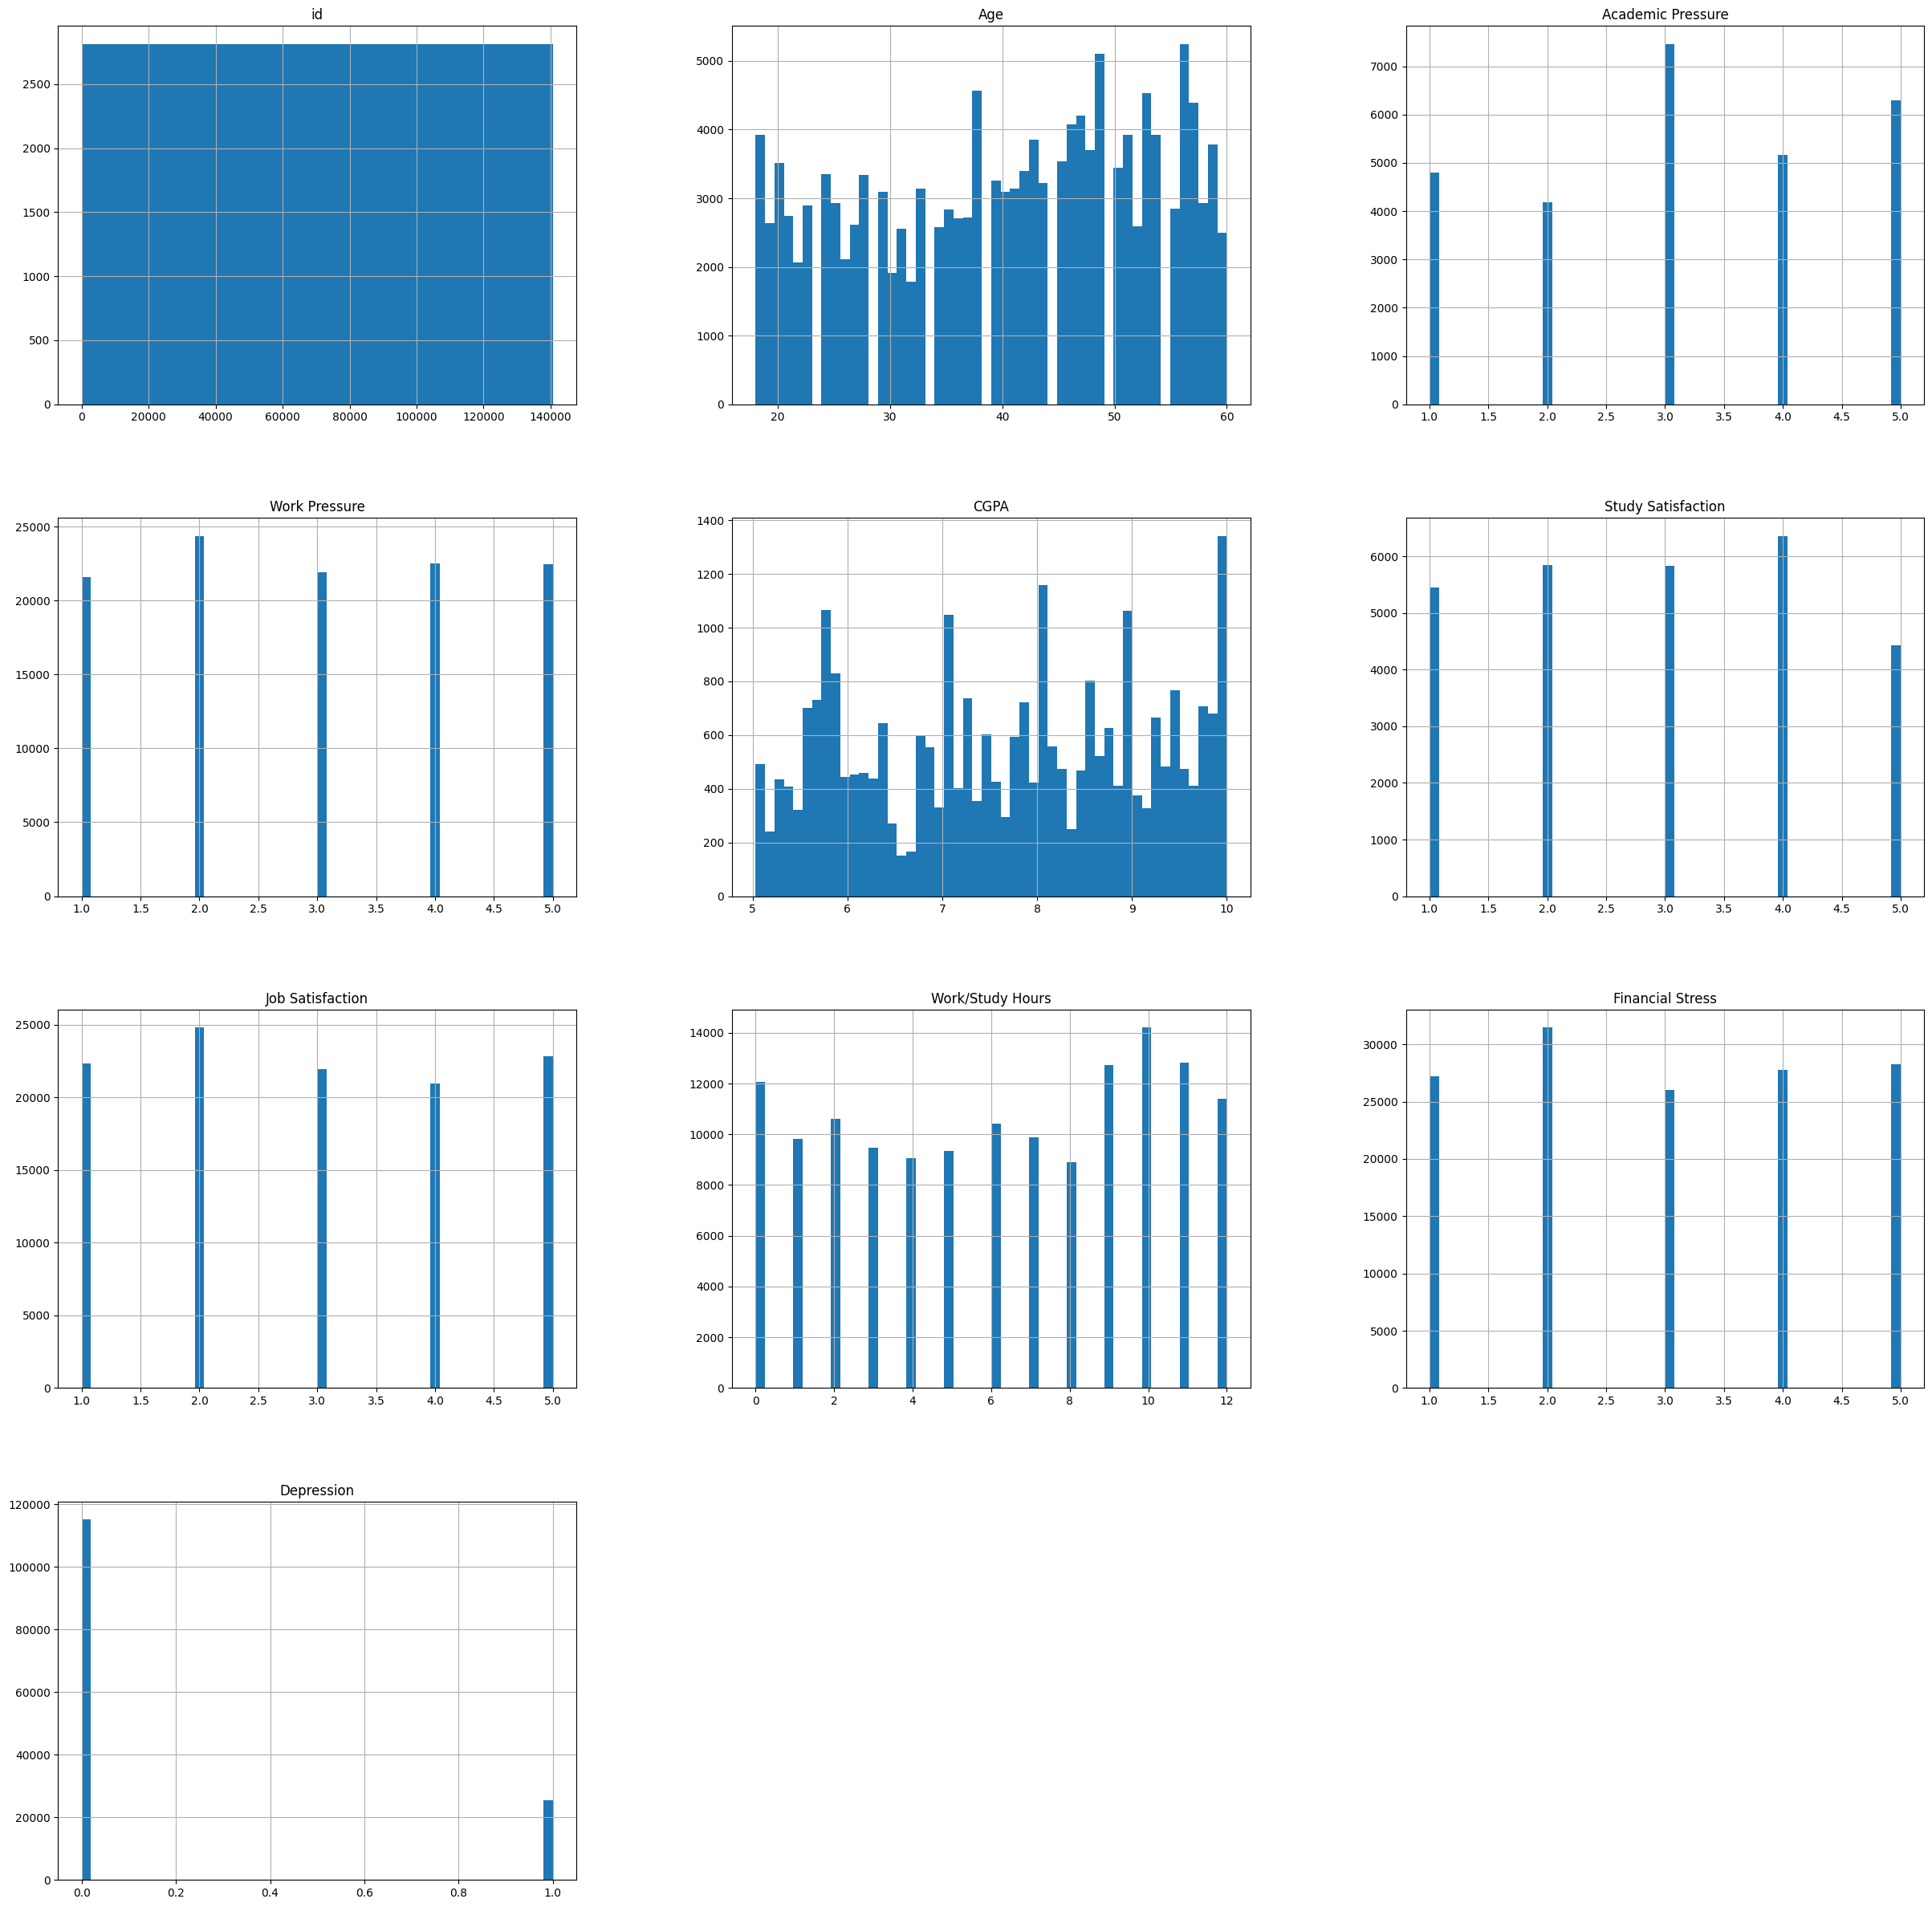

In [8]:
df_train.hist(bins=50, figsize=(30,30))
plt.show()

In [9]:
columns = ['id','Name','Academic Pressure','CGPA','Study Satisfaction']
df_train_1=df_train.drop(columns, axis=1)

In [10]:
df_train_1.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [11]:
for i in df_train_1:
    print(f'{i} = {set(df_train_1[i])}')

Gender = {'Male', 'Female'}
Age = {18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0}
City = {'Kashish', 'Kibara', 'Nalyan', 'Chhavi', 'Harsh', 'Keshav', 'Visakhapatnam', 'Krishna', 'Khushi', 'Less than 5 Kalyan', 'Raghavendra', 'Vasai-Virar', 'Anvi', 'Gurgaon', 'Less Delhi', 'Mira', 'Patna', 'Meerut', 'Ishanabad', 'Indore', 'Kolkata', 'No', 'Bhopal', 'Kashk', 'Nagpur', 'Agra', 'Vadodara', 'Tushar', 'Rajkot', 'Aaradhya', 'Ithal', 'Saanvi', 'Nashik', 'Ivaan', 'Delhi', 'Ayansh', 'Plata', 'Nalini', 'Rashi', 'Vidya', 'Vaanya', 'City', 'Bhavna', 'Itheg', 'Faridabad', 'Krinda', 'Researcher', 'Thane', 'Vaishnavi', 'Moreadhyay', 'Gaurav', 'Galesabad', 'Jaipur', 'Surat', 'Hyderabad', 'Aditya', 'Kalyan', 'Atharv', 'Ludhiana', '3.0', 'MCA', 'Mahi', 'Ahmedabad', 'Armaan', 'Varanasi', 'Pune', 'C

In [12]:
le = LabelEncoder()
df_train_1['Gender_num'] = le.fit_transform(df_train_1['Gender'])
df_train_1['City_num'] = le.fit_transform(df_train_1['City'])
df_train_1['Working Professional or Student_num'] = le.fit_transform(df_train_1['Working Professional or Student'])
df_train_1['Profession_num'] = le.fit_transform(df_train_1['Profession'])
df_train_1['Sleep Duration_num'] = le.fit_transform(df_train_1['Sleep Duration'])
df_train_1['Dietary Habits_num'] = le.fit_transform(df_train_1['Dietary Habits'])
df_train_1['Degree_num'] = le.fit_transform(df_train_1['Degree'])
df_train_1['Have you ever had suicidal thoughts ?_num'] = le.fit_transform(df_train_1['Have you ever had suicidal thoughts ?'])
df_train_1['Family History of Mental Illness_num'] = le.fit_transform(df_train_1['Family History of Mental Illness'])
df_train_1.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Depression,Gender_num,City_num,Working Professional or Student_num,Profession_num,Sleep Duration_num,Dietary Habits_num,Degree_num,Have you ever had suicidal thoughts ?_num,Family History of Mental Illness_num
0,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,...,0,0,50,1,10,29,7,33,0,0
1,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,...,1,1,93,1,55,27,20,63,1,0
2,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,...,1,1,97,0,64,15,7,21,1,0
3,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,...,1,1,64,1,55,27,15,28,1,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,...,0,0,37,1,9,15,20,28,1,1


In [13]:
columns = ['Gender','City','Working Professional or Student','Profession','Sleep Duration','Dietary Habits','Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']
df_train_2=df_train_1.drop(columns, axis=1)
df_train_2.head()

,Age,Work Pressure,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_num,City_num,Working Professional or Student_num,Profession_num,Sleep Duration_num,Dietary Habits_num,Degree_num,Have you ever had suicidal thoughts ?_num,Family History of Mental Illness_num
0,49.0,5.0,2.0,1.0,2.0,0,0,50,1,10,29,7,33,0,0
1,26.0,4.0,3.0,7.0,3.0,1,1,93,1,55,27,20,63,1,0
2,33.0,NaN,NaN,3.0,1.0,1,1,97,0,64,15,7,21,1,0
3,22.0,5.0,1.0,10.0,1.0,1,1,64,1,55,27,15,28,1,1
4,30.0,1.0,1.0,9.0,4.0,0,0,37,1,9,15,20,28,1,1


In [14]:
for i in df_train_2:
    print(f'{i} = {set(df_train_2[i])}')

Age = {18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0}
Work Pressure = {1.0, 2.0, 3.0, 4.0, 5.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [15]:
Work_pressure = np.random.randint(1, 5)
df_train_2['Work Pressure'].fillna(Work_pressure, inplace = True)
print(df_train_2['Work Pressure'].isnull().sum())

0


/tmp/ipykernel_17/939644069.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_2['Work Pressure'].fillna(Work_pressure, inplace = True)


In [16]:
Job_satisfaction = np.random.randint(1, 5)
df_train_2['Job Satisfaction'].fillna(Job_satisfaction, inplace = True)
print(df_train_2['Job Satisfaction'].isnull().sum())

0


/tmp/ipykernel_17/1608531710.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_2['Job Satisfaction'].fillna(Job_satisfaction, inplace = True)


In [17]:
Financial_Stress = np.random.randint(1, 5)
df_train_2['Financial Stress'].fillna(Financial_Stress, inplace = True)
print(df_train_2['Financial Stress'].isnull().sum())

0


/tmp/ipykernel_17/3594542754.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_2['Financial Stress'].fillna(Financial_Stress, inplace = True)


In [18]:
Dietary_habits = np.random.randint(0, 23)
df_train_2['Dietary Habits_num'].fillna(Dietary_habits, inplace = True)
print(df_train_2['Dietary Habits_num'].isnull().sum())

0


/tmp/ipykernel_17/1852841815.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_2['Dietary Habits_num'].fillna(Dietary_habits, inplace = True)


In [19]:
Degree = np.random.randint(0, 115)
df_train_2['Degree_num'].fillna(Dietary_habits, inplace = True)
print(df_train_2['Degree_num'].isnull().sum())

/tmp/ipykernel_17/3561232215.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_2['Degree_num'].fillna(Dietary_habits, inplace = True)


0


In [20]:
for i in df_train_2:
    print(f'{i} = {set(df_train_2[i])}')

Age = {18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0}
Work Pressure = {1.0, 2.0, 3.0, 4.0, 5.0}
Job Satisfaction = {1.0, 2.0, 3.0, 4.0, 5.0}
Work/Study Hours = {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0}
Financial Stress = {1.0, 2.0, 3.0, 4.0, 5.0}
Depression = {0, 1}
Gender_num = {0, 1}
City_num = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97}
Working Professional or Student_num = {0, 1}
Profession_num = {0, 1, 2, 3, 4, 5, 

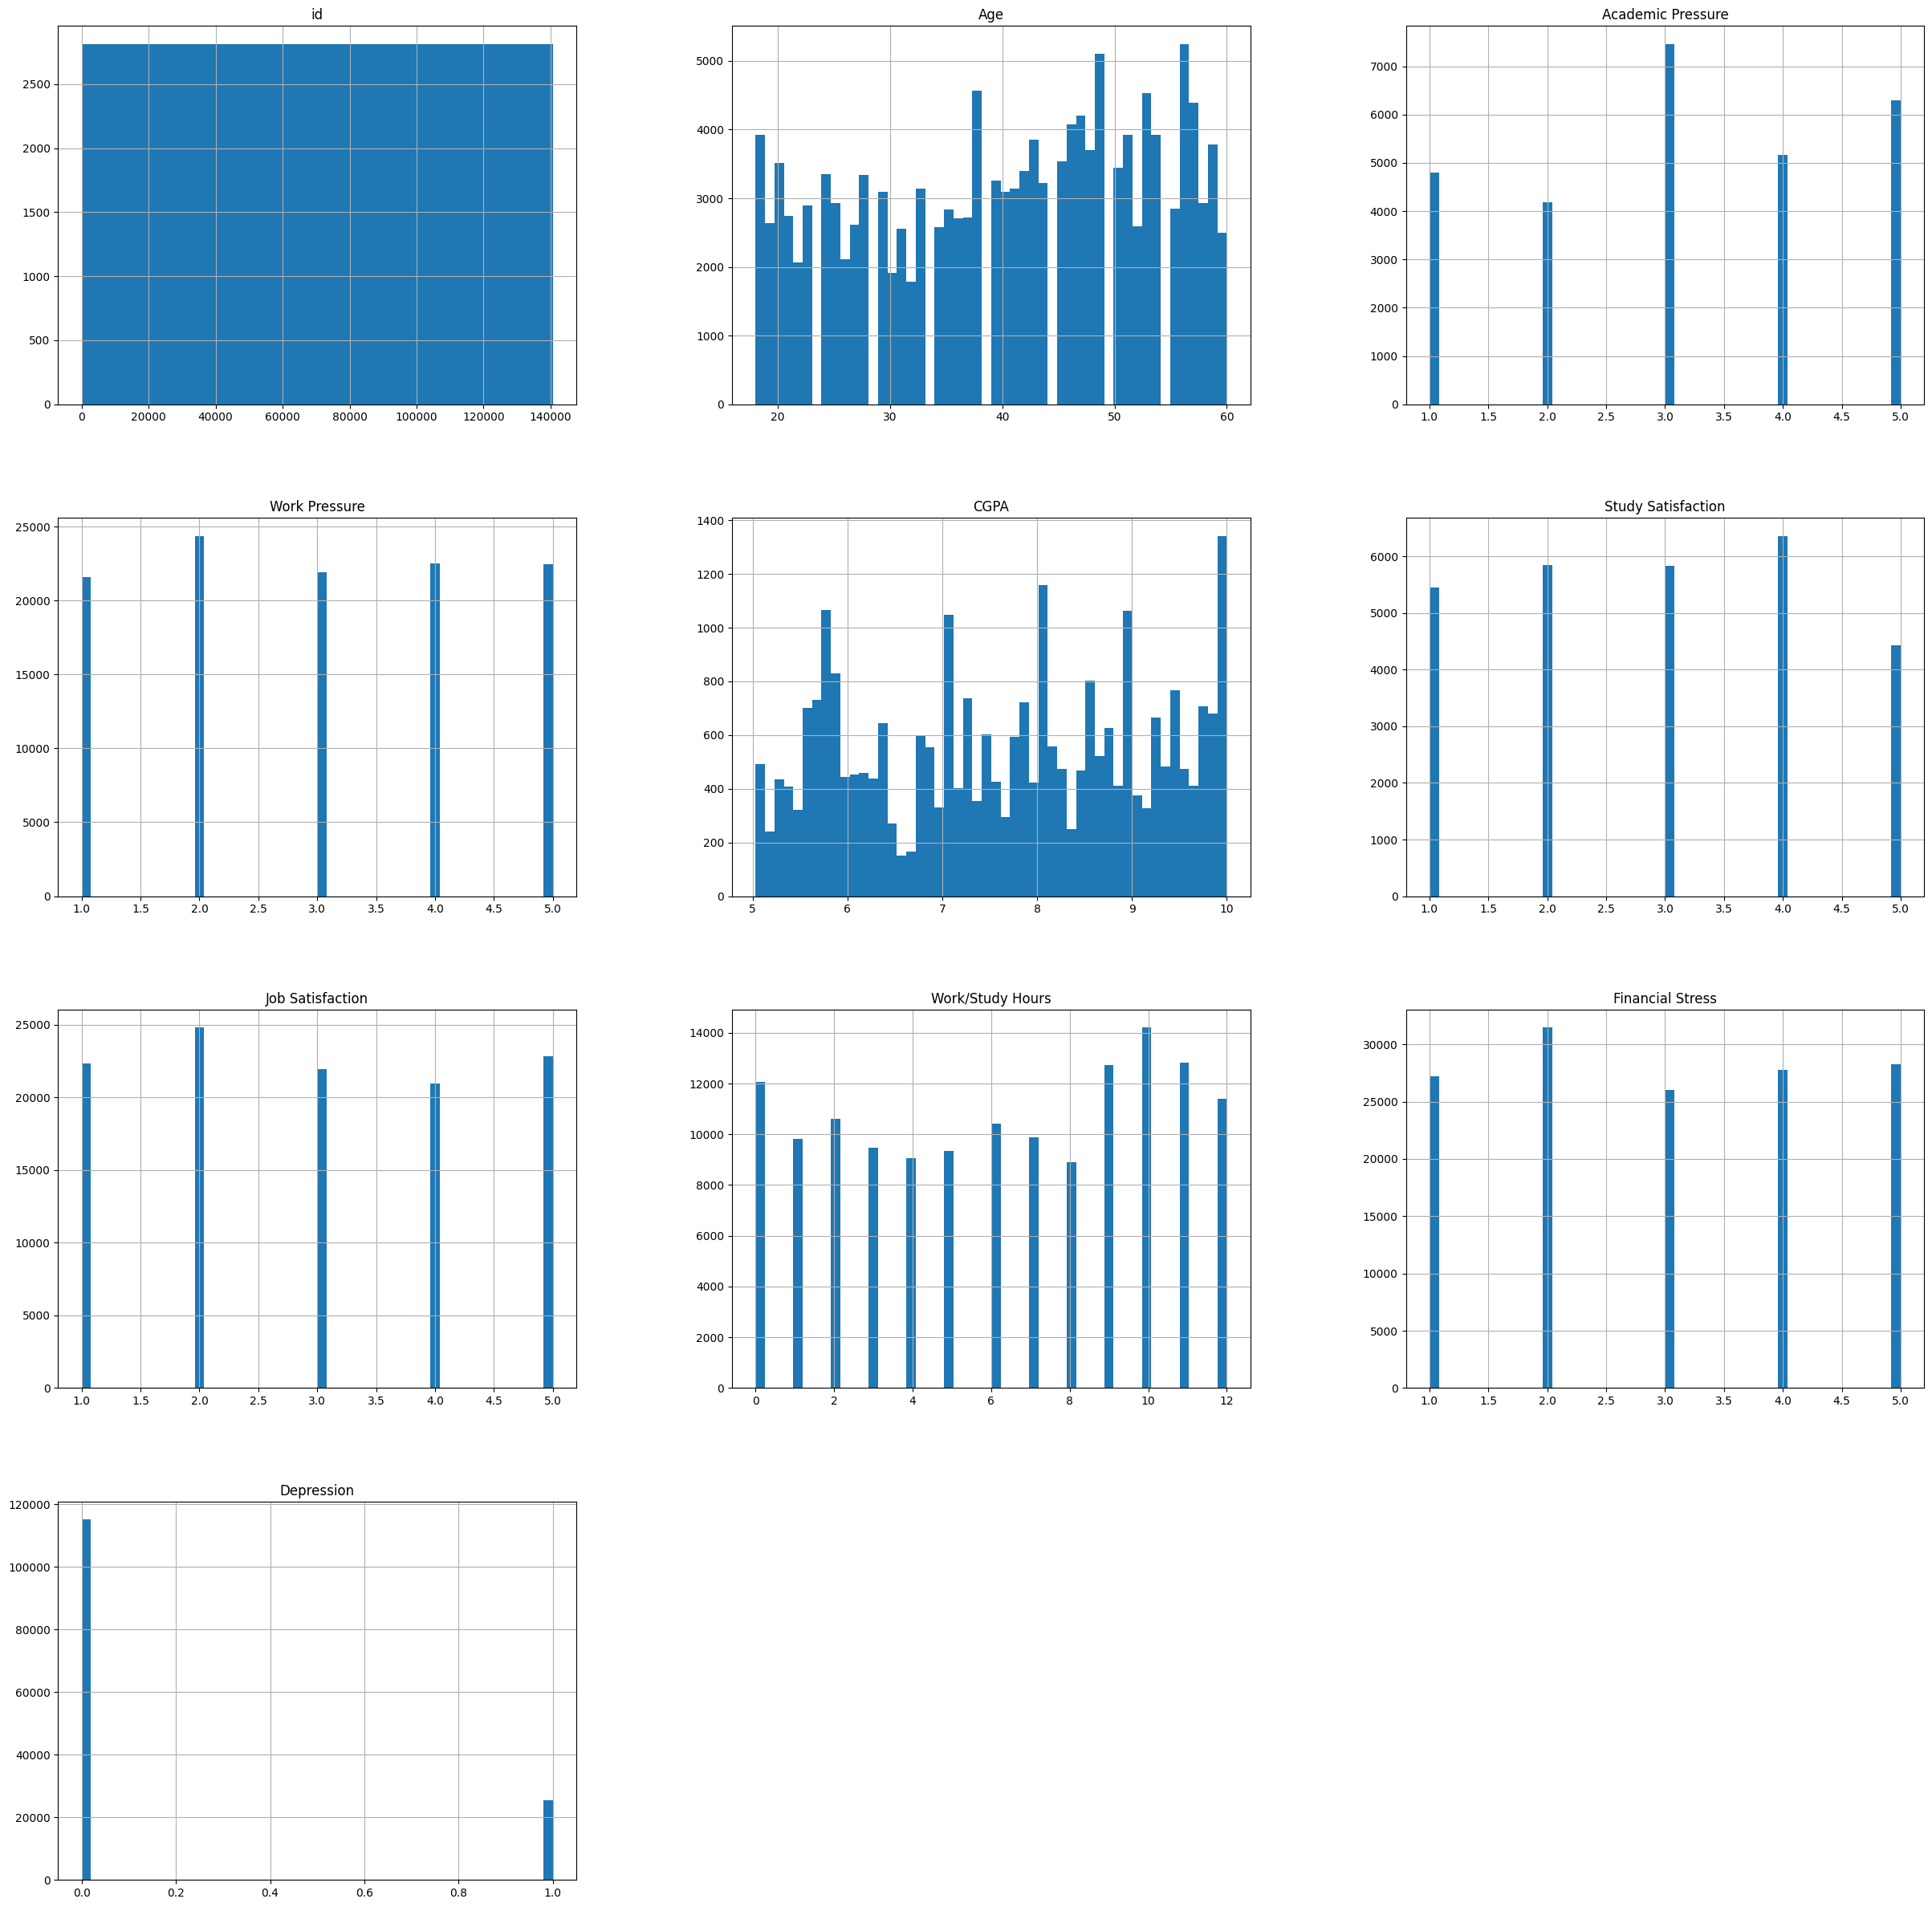

In [21]:
df_train.hist(bins=50, figsize=(30,30))
plt.show()

In [22]:
df_train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Age                                        140700 non-null  float64
 1   Work Pressure                              140700 non-null  float64
 2   Job Satisfaction                           140700 non-null  float64
 3   Work/Study Hours                           140700 non-null  float64
 4   Financial Stress                           140700 non-null  float64
 5   Depression                                 140700 non-null  int64  
 6   Gender_num                                 140700 non-null  int64  
 7   City_num                                   140700 non-null  int64  
 8   Working Professional or Student_num        140700 non-null  int64  
 9   Profession_num                             140700 non-null  int64  
 10  Sleep Du

<Axes: >

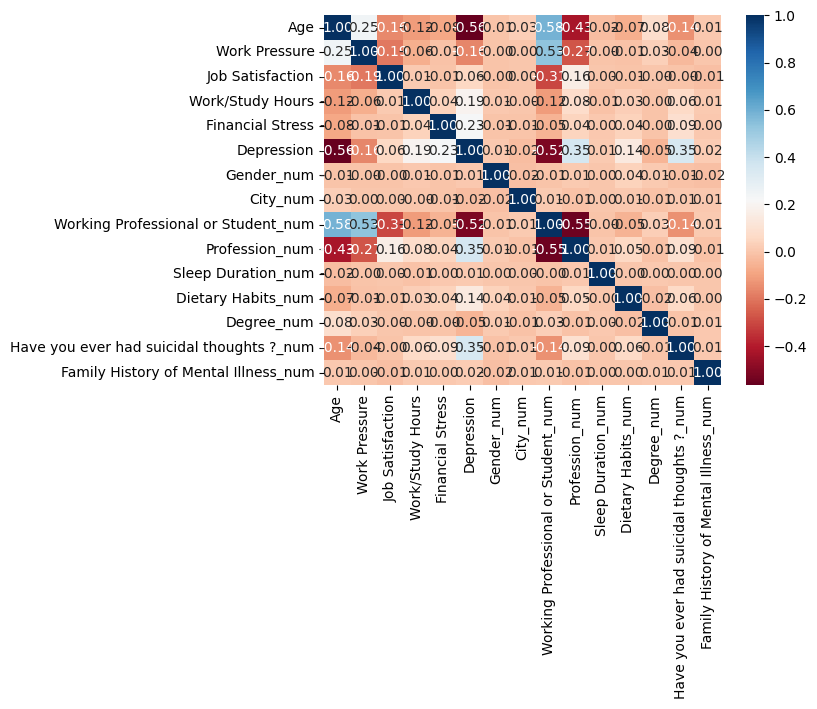

In [23]:
corr = df_train_2.corr()
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

In [24]:
Y_train = df_train_2.loc[:, 'Depression']
X_train = df_train_2.drop(['Depression'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)

In [25]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(14,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# entrena el modelo
model.fit(x_train,
          y_train,
          epochs=35,
          batch_size=128,
          validation_data = (x_test,y_test))

Epoch 1/35
770/770 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8644 - loss: 0.3491 - val_accuracy: 0.9176 - val_loss: 0.1921
Epoch 2/35
770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9195 - loss: 0.1916 - val_accuracy: 0.9217 - val_loss: 0.1875
Epoch 3/35
770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9220 - loss: 0.1878 - val_accuracy: 0.9221 - val_loss: 0.1884
Epoch 4/35
770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9248 - loss: 0.1840 - val_accuracy: 0.9224 - val_loss: 0.1863
Epoch 5/35
770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9256 - loss: 0.1812 - val_accuracy: 0.9271 - val_loss: 0.1762
Epoch 6/35
770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9254 - loss: 0.1807 - val_accuracy: 0.9279 - val_loss: 0.1754
Epoch 7/35
770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9281 - loss: 0.1781 - val_accuracy: 0.9260 - val_loss: 0.1795
Epoch 8/35
770/770 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9274 - loss: 0.1783 - val_accuracy: 0.

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

1320/1320 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9257 - loss: 0.1774
Test accuracy: 0.9274579286575317
Test loss: 0.17439749836921692


In [29]:
df_test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [30]:
columns = ['id','Name','Academic Pressure','CGPA','Study Satisfaction']
df_test_1=df_test.drop(columns, axis=1)
df_test_1.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,53.0,Visakhapatnam,Working Professional,Judge,2.0,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,Female,58.0,Kolkata,Working Professional,Educational Consultant,2.0,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,Male,53.0,Jaipur,Working Professional,Teacher,4.0,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,Female,23.0,Rajkot,Student,NaN,NaN,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,Male,47.0,Kalyan,Working Professional,Teacher,5.0,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [31]:
le = LabelEncoder()
df_test_1['Gender_num'] = le.fit_transform(df_test_1['Gender'])
df_test_1['City_num'] = le.fit_transform(df_test_1['City'])
df_test_1['Working Professional or Student_num'] = le.fit_transform(df_test_1['Working Professional or Student'])
df_test_1['Profession_num'] = le.fit_transform(df_test_1['Profession'])
df_test_1['Sleep Duration_num'] = le.fit_transform(df_test_1['Sleep Duration'])
df_test_1['Dietary Habits_num'] = le.fit_transform(df_test_1['Dietary Habits'])
df_test_1['Degree_num'] = le.fit_transform(df_test_1['Degree'])
df_test_1['Have you ever had suicidal thoughts ?_num'] = le.fit_transform(df_test_1['Have you ever had suicidal thoughts ?'])
df_test_1['Family History of Mental Illness_num'] = le.fit_transform(df_test_1['Family History of Mental Illness'])
df_test_1.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Family History of Mental Illness,Gender_num,City_num,Working Professional or Student_num,Profession_num,Sleep Duration_num,Dietary Habits_num,Degree_num,Have you ever had suicidal thoughts ?_num,Family History of Mental Illness_num
0,Male,53.0,Visakhapatnam,Working Professional,Judge,2.0,5.0,Less than 5 hours,Moderate,LLB,...,Yes,1,67,1,27,25,12,53,0,1
1,Female,58.0,Kolkata,Working Professional,Educational Consultant,2.0,4.0,Less than 5 hours,Moderate,B.Ed,...,No,0,25,1,19,25,12,16,0,0
2,Male,53.0,Jaipur,Working Professional,Teacher,4.0,1.0,7-8 hours,Moderate,B.Arch,...,No,1,21,1,56,16,12,12,1,0
3,Female,23.0,Rajkot,Student,NaN,NaN,NaN,More than 8 hours,Moderate,BSc,...,No,0,47,0,64,27,12,35,1,0
4,Male,47.0,Kalyan,Working Professional,Teacher,5.0,5.0,7-8 hours,Moderate,BCA,...,No,1,22,1,56,16,12,28,1,0


In [32]:
columns = ['Gender','City','Working Professional or Student','Profession','Sleep Duration','Dietary Habits','Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']
df_test_2=df_test_1.drop(columns, axis=1)
df_test_2.head()

,Age,Work Pressure,Job Satisfaction,Work/Study Hours,Financial Stress,Gender_num,City_num,Working Professional or Student_num,Profession_num,Sleep Duration_num,Dietary Habits_num,Degree_num,Have you ever had suicidal thoughts ?_num,Family History of Mental Illness_num
0,53.0,2.0,5.0,9.0,3.0,1,67,1,27,25,12,53,0,1
1,58.0,2.0,4.0,6.0,4.0,0,25,1,19,25,12,16,0,0
2,53.0,4.0,1.0,12.0,4.0,1,21,1,56,16,12,12,1,0
3,23.0,NaN,NaN,10.0,4.0,0,47,0,64,27,12,35,1,0
4,47.0,5.0,5.0,3.0,4.0,1,22,1,56,16,12,28,1,0


In [33]:
for i in df_test_2:
    print(f'{i} = {set(df_test_2[i])}')

Age = {18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 32.08}
Work Pressure = {1.0, 2.0, 3.0, 4.0, 5.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [34]:
Profession = np.random.randint(0, 64)
df_test_2['Profession_num'].fillna(Profession, inplace = True)
print(df_test_2['Profession_num'].isnull().sum())

0


/tmp/ipykernel_17/4214367240.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_2['Profession_num'].fillna(Profession, inplace = True)


In [35]:
Work_pressure = np.random.randint(1, 5)
df_test_2['Work Pressure'].fillna(Work_pressure, inplace = True)
print(df_test_2['Work Pressure'].isnull().sum())

0


/tmp/ipykernel_17/1177122421.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_2['Work Pressure'].fillna(Work_pressure, inplace = True)


In [36]:
Job_satisfaction = np.random.randint(1, 5)
df_test_2['Job Satisfaction'].fillna(Job_satisfaction, inplace = True)
print(df_test_2['Job Satisfaction'].isnull().sum())

0


/tmp/ipykernel_17/2187595080.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_2['Job Satisfaction'].fillna(Job_satisfaction, inplace = True)


In [37]:
Dietary_habits = np.random.randint(0, 23)
df_test_2['Dietary Habits_num'].fillna(Dietary_habits, inplace = True)
print(df_test_2['Dietary Habits_num'].isnull().sum())

0


/tmp/ipykernel_17/3842104639.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_2['Dietary Habits_num'].fillna(Dietary_habits, inplace = True)


In [38]:
Degree = np.random.randint(0, 115)
df_test_2['Degree_num'].fillna(Dietary_habits, inplace = True)
print(df_test_2['Degree_num'].isnull().sum())

0


/tmp/ipykernel_17/1704449433.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_2['Degree_num'].fillna(Dietary_habits, inplace = True)


In [39]:
for i in df_test_2:
    print(f'{i} = {set(df_test_2[i])}')

Age = {18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 32.08}
Work Pressure = {1.0, 2.0, 3.0, 4.0, 5.0}
Job Satisfaction = {1.0, 2.0, 3.0, 4.0, 5.0}
Work/Study Hours = {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0}
Financial Stress = {1.0, 2.0, 3.0, 4.0, 5.0}
Gender_num = {0, 1}
City_num = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67}
Working Professional or Student_num = {0, 1}
Profession_num = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4

In [40]:
y_test_hat = model.predict(df_test_2)
y_test_hat

2932/2932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


array([[4.2780576e-04],
       [1.0962926e-04],
       [8.8755405e-03],
       ...,
       [5.0218541e-02],
       [8.2002467e-01],
       [1.8764766e-03]], dtype=float32)

In [41]:
threshold = 0.5
y_predicted_classes = (y_test_hat > threshold).astype(int)

print(y_predicted_classes)

[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [42]:
df_predict = df_test.assign(Depression=y_predicted_classes)
df_predict.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,0
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,0
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,0
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,1
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,0


In [43]:
df_predict['Depression'].unique()

array([0, 1])

In [44]:
df_predict= df_predict[["id", "Depression"]]
df_predict.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0


In [45]:
df_predict.to_csv("submission_1.csv", index=False)